In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison 
import seaborn as sns

In [2]:
YouTube = pd.read_csv(r"C:\Users\minel\OneDrive\Documents\Entity Coursework\DSO105C (Oct 3 - Oct 23)\Lesson 4\YouTubeChannels_Python.csv")

In [3]:
YouTube.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


# Wrangling

In [4]:
YouTube1 = YouTube[['Gr2de', 'Video views']]

In [5]:
YouTube1.head()

,Gr2de,Video views
0,0,20869786591
1,0,47548839843
2,0,9793305082
3,0,22675948293
4,0,26273668433


In [6]:
YouTube1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gr2de        5000 non-null   int64
 1   Video views  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


In [7]:
def recode (series): 
    if series == 0: 
        return "A plus plus"
    if series == 1: 
        return "A plus"
    if series == 2: 
        return "A"
    if series == 3:
        return "B plus"

YouTube1['GradeR'] = YouTube1['Gr2de'].apply(recode)

C:\Users\minel\AppData\Local\Temp\ipykernel_20584\1449548847.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YouTube1['GradeR'] = YouTube1['Gr2de'].apply(recode)


In [8]:
YouTube1.head()

,Gr2de,Video views,GradeR
0,0,20869786591,A plus plus
1,0,47548839843,A plus plus
2,0,9793305082,A plus plus
3,0,22675948293,A plus plus
4,0,26273668433,A plus plus


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Video views', ylabel='Density'>

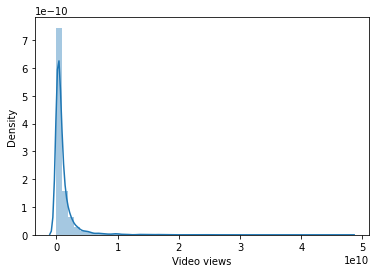

In [9]:
sns.distplot(YouTube1['Video views'])

In [10]:
YouTube1['VideoViewsSQRT'] = np.sqrt(YouTube1['Video views'])

C:\Users\minel\AppData\Local\Temp\ipykernel_20584\1292546222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YouTube1['VideoViewsSQRT'] = np.sqrt(YouTube1['Video views'])


In [11]:
YouTube1.head()

,Gr2de,Video views,GradeR,VideoViewsSQRT
0,0,20869786591,A plus plus,144463.789896
1,0,47548839843,A plus plus,218056.964674
2,0,9793305082,A plus plus,98961.129147
3,0,22675948293,A plus plus,150585.352186
4,0,26273668433,A plus plus,162091.543373


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VideoViewsSQRT', ylabel='Density'>

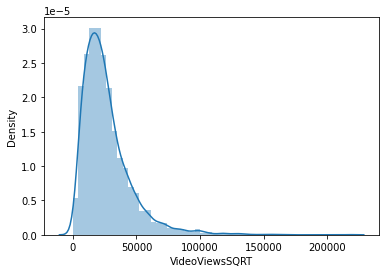

In [12]:
sns.distplot(YouTube1['VideoViewsSQRT'])

In [13]:
YouTube1['VideoViewsLOG'] = np.log(YouTube1['Video views'])

C:\Users\minel\AppData\Local\Temp\ipykernel_20584\2740838094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YouTube1['VideoViewsLOG'] = np.log(YouTube1['Video views'])


In [14]:
YouTube1.head()

,Gr2de,Video views,GradeR,VideoViewsSQRT,VideoViewsLOG
0,0,20869786591,A plus plus,144463.789896,23.761568
1,0,47548839843,A plus plus,218056.964674,24.585023
2,0,9793305082,A plus plus,98961.129147,23.004965
3,0,22675948293,A plus plus,150585.352186,23.844571
4,0,26273668433,A plus plus,162091.543373,23.991833


C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VideoViewsLOG', ylabel='Density'>

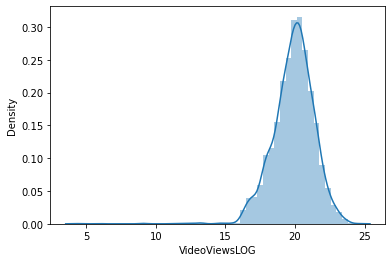

In [15]:
sns.distplot(YouTube1['VideoViewsLOG'])

# Homogeneity of Variance

In [16]:
scipy.stats.bartlett(YouTube1['VideoViewsLOG'], YouTube1['Gr2de'])

BartlettResult(statistic=4642.606911455518, pvalue=0.0)

# Analysis

In [17]:
YouTubeNatural.dropna(inplace=True)

NameError: name 'YouTubeNatural' is not defined

In [18]:
stats.f_oneway(YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='A plus plus'],
                   YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='A plus'],
               YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='A'],
               YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='B plus'])

F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

In [19]:
YouTube1.groupby('GradeR').mean()

,Gr2de,Video views,VideoViewsSQRT,VideoViewsLOG
GradeR,,,,
A,2.0,1.676207e+09,34678.089608,20.475580
A plus,1.0,6.053121e+09,70951.341638,22.055279
A plus plus,0.0,2.119909e+10,139631.341341,23.578544
B plus,3.0,5.265217e+08,19943.101566,19.449400
